In [1]:
%cd "../fiberphotopy"

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import random
from scipy import signal

import importlib
import fp_utils
import behavioral_data
import fiber_data
import analysis

def rel():
    importlib.reload(behavioral_data)
    importlib.reload(fiber_data)
    importlib.reload(analysis)
    importlib.reload(fp_utils)

In [3]:
AS21R = analysis.MultiSession('../../DATA/AS21R/')


Importing folder rat_10_SA_1...
Importing ../../DATA/AS21R//rat_10_SA_1/bsa02032022c20_01.dat...
Importing of ../../DATA/AS21R//rat_10_SA_1/bsa02032022c20_01.dat finished in 0.0389862060546875 seconds
Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/AS21R//rat_10_SA_1/AS21RSA1Rat1002032022_0.csv finished in 1.7818145751953125 seconds

Importing folder rat_10_SA_2...
Importing ../../DATA/AS21R//rat_10_SA_2/bsa08032022c20_02.dat...
Importing of ../../DATA/AS21R//rat_10_SA_2/bsa08032022c20_02.dat finished in 0.044974327087402344 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_10_SA_2/AS21RSA2Rat1008032022_0.csv finished in 1.0623784065246582 seconds

Importing folder rat_11_SA_1...
Importing ../../DATA/AS21R//rat_11_SA_1/bsa03032022c20_01.dat...
Importing of ../../DATA/AS21R//rat_11_SA_1/bsa03032022c20_01.dat finished in 0.0419764518737793 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_11_SA_1/AS21RSA1Rat1103032022_0.csv finished in 1.7849421501159668 seconds

Importing folder rat_11_SA_2...
Importing ../../DATA/AS21R//rat_11_SA_2/bsa09032022c20_02.dat...
Importing of ../../DATA/AS21R//rat_11_SA_2/bsa09032022c20_02.dat finished in 0.06797003746032715 seconds
Analyzing peaks...
Impo

Analyzing peaks...
Importing of ../../DATA/AS21R//rat_5_SA_6/AS21RSA6Rat523032022_0.csv finished in 1.7709999084472656 seconds

Importing folder rat_5_SA_7...
Importing ../../DATA/AS21R//rat_5_SA_7/bsa28032022c20_01.dat...
Importing of ../../DATA/AS21R//rat_5_SA_7/bsa28032022c20_01.dat finished in 0.04797244071960449 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_5_SA_7/AS21RSAxRat528032022_0.csv finished in 1.7773501873016357 seconds

Importing folder rat_8_SA_1...
Importing ../../DATA/AS21R//rat_8_SA_1/bsa03032022c20_02.dat...
Importing of ../../DATA/AS21R//rat_8_SA_1/bsa03032022c20_02.dat finished in 0.04297471046447754 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R//rat_8_SA_1/AS21RSA1Rat803032022recording1.csv finished in 0.35779786109924316 seconds

Importing folder rat_8_SA_2...
Importing ../../DATA/AS21R//rat_8_SA_2/bsa04032022c20_02.dat...
Importing of ../../DATA/AS21R//rat_8_SA_2/bsa04032022c20_02.dat finished in 0.05097055435180664 seconds
Analyzing 

In [4]:
analysis = AS21R.analyze('switch_dto_nd')

No fiber recording at this timestamp:
2400.0
../../DATA/AS21R//rat_8_SA_1/AS21RSA1Rat803032022recording1.csv ../../DATA/AS21R//rat_8_SA_1/bsa03032022c20_02.dat
No fiber recording at this timestamp:
5700.002
../../DATA/AS21R//rat_8_SA_1/AS21RSA1Rat803032022recording1.csv ../../DATA/AS21R//rat_8_SA_1/bsa03032022c20_02.dat


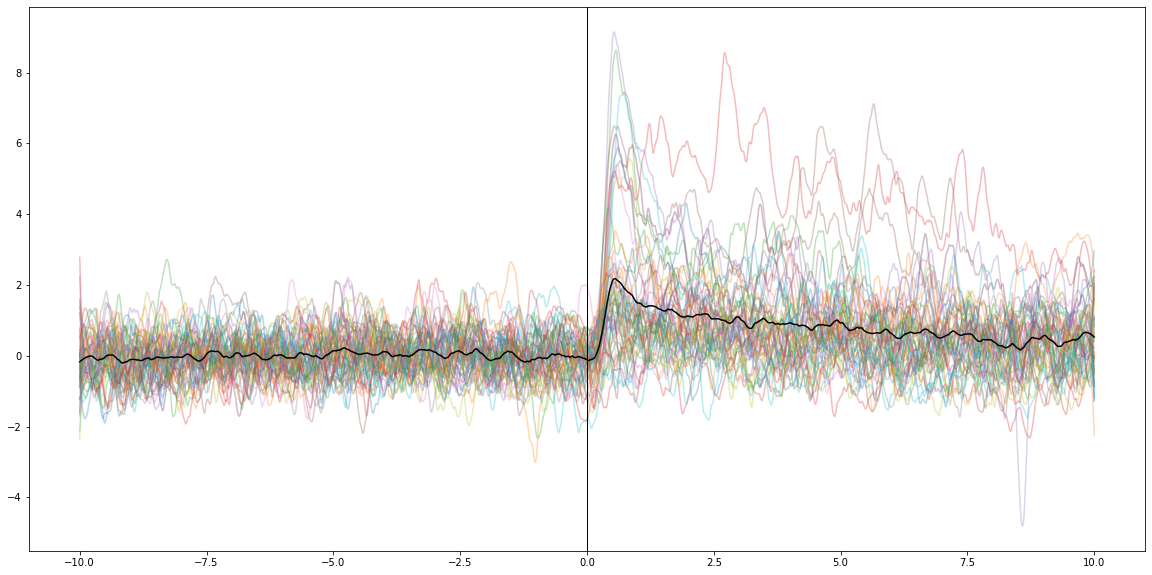

In [5]:
analysis.plot('zscores')

In [6]:
analysis.elements

{'HLED_OFF': [True, 'Drug Period', '#069AF3'],
 'HLED_ON': [True, 'No Drug Period', 'gold'],
 'TTL1_ON': [True, 'Fiber Photometry Recordings', 'g'],
 'np1': [True, 'Active Nosepokes', 'r'],
 'np2': [True, 'Inactive Nosepokes', 'b'],
 'inj1': [True, 'Injections', 'k'],
 'LED1_ON': [True, 'Conditioned Stimulus', 'goldenrod'],
 'LED1_OFF': [False, 'LED1_OFF', ['darkgray', 'darkgrey']],
 'LED2_OFF': [False, 'LED2_OFF', 'slategrey'],
 'LED2_ON': [True, ' Drug Light On', 'slategrey'],
 'DARK': [False, 'DARK', 'k'],
 'TO_DARK': [False, 'TO_DARK', 'olivedrab'],
 'NOTO_DARK': [False, 'NOTO_DARK', 'black'],
 'TIMEOUT': [True, 'Time outs', 'k'],
 'switch_d_nd': [False, 'Switch from D to ND', 'r'],
 'switch_to_nd': [False, 'Switch from TO to ND', 'r'],
 'switch_nd_d': [False, 'Switch from ND to D', 'b']}

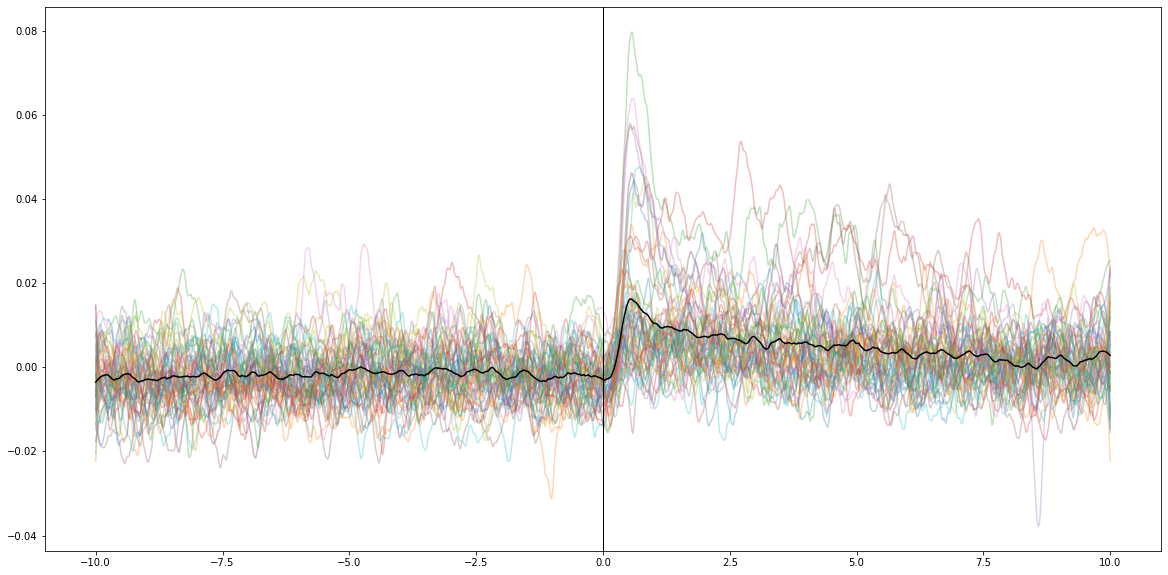

In [7]:
analysis.plot('signal')

In [8]:
def plot_things(pre,post):
    n = len(pre)
    menMeans   = (pre.mean(),post.mean())
    menStd     = (pre.std()/np.sqrt(n),post.std()/np.sqrt(n))
    ind  = np.arange(2)    # the x locations for the groups
    width= 0.7
    labels = ('A', 'B')

    # Pull the formatting out here
    bar_kwargs = {'width':width,'color':'y','linewidth':2,'zorder':5}
    err_kwargs = {'zorder':0,'fmt':'none','linewidth':2,'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

    fig, ax = plt.subplots()
    ax.p1 = plt.bar(ind, menMeans, **bar_kwargs)
    ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)
    
    df = pd.DataFrame({'mean':menMeans,'standard dev':(pre.std(),post.std()),'SEM':menStd},index=['pre','post'])
    return df


mean  standard dev           SEM
pre   8.985493e-18  4.034875e-17  5.490769e-18
post  8.111148e-01  9.485028e-01  1.290749e-01

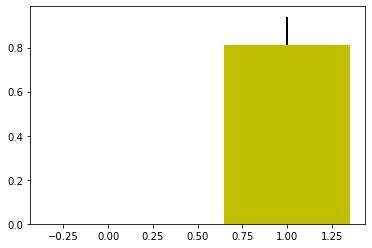

In [9]:
plot_things(np.array(analysis.preAVG_Z),np.array(analysis.postAVG_Z))

mean  standard dev       SEM
pre  -0.017867      0.037589  0.005115
post  0.048101      0.061566  0.008378

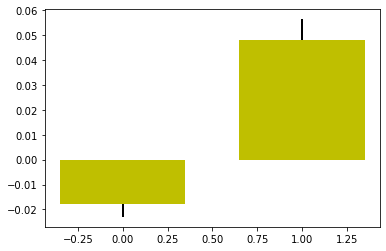

In [10]:
plot_things(np.array(analysis.preAUC),np.array(analysis.postAUC))

0.9474939229092894

In [39]:
columns = ['preF','preA','postF','postA','NDNP','postAVGZ']
di = {k:[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan] for k in analysis.rat_sessions.keys()}
for k,v in analysis.rat_sessions.items():
    T = v.behavior.timestamps('switch_dto_nd',interval='TTL1_ON')
    preF,preA,postF,postA,postAVGZ = [],[],[],[],[]
    for t in T:
        try:
            pre  = v.fiber.peakFA(t-10,t)
            post = v.fiber.peakFA(t,t+10)
            preF.append(pre['frequency'])
            preA.append(pre['mean dF/F'])
            postF.append(post['frequency'])
            postA.append(post['mean dF/F'])
            postAVGZ.append(v.analyze_perievent(t).postAVG_Z)
        except:
            print(f"didn't work for {k} at {t}")
    di[k][0] = np.mean(preF)
    di[k][1] = np.mean(preA)
    di[k][2] = np.mean(postF)
    di[k][3] = np.mean(postA)
    di[k][4] = len(v.behavior.timestamps('np1','HLED_ON'))
    di[k][5] = np.mean(postAVGZ)
df = pd.DataFrame.from_dict(di, orient='index',columns=columns)
df.dropna(inplace=True)

C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


didn't work for rat_8_SA_1 at 2400.0
didn't work for rat_8_SA_1 at 5700.002


mean  standard dev       SEM
pre   2.113218      0.422576  0.078470
post  2.175287      0.492387  0.091434

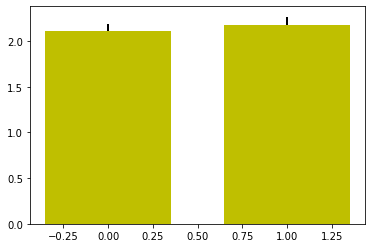

In [40]:
plot_things(df['preF'].values,df['postF'].values)

mean  standard dev       SEM
pre   0.016958      0.004836  0.000898
post  0.025861      0.009931  0.001844

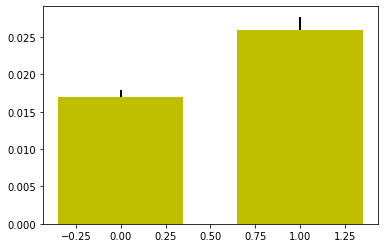

In [41]:
plot_things(df['preA'].values,df['postA'].values)

In [42]:
df

preF      preA     postF     postA  NDNP  postAVGZ
rat_10_SA_1  2.300000  0.014061  1.850000  0.019818     2  0.413376
rat_10_SA_2  2.800000  0.013692  2.700000  0.024144    35  0.947202
rat_11_SA_1  1.700000  0.020796  2.300000  0.017347     8 -0.294175
rat_11_SA_2  1.500000  0.017900  2.300000  0.018346    96  0.420994
rat_11_SA_3  2.200000  0.015637  2.700000  0.017584    74  0.387274
rat_11_SA_4  1.500000  0.026897  1.800000  0.021984   170 -0.333041
rat_11_SA_5  2.250000  0.015337  2.500000  0.016737     2  0.126372
rat_11_SA_6  2.150000  0.017665  2.500000  0.018973   422  0.473535
rat_11_SA_8  2.800000  0.013393  2.100000  0.019301  1267  0.381101
rat_12_SA_1  1.400000  0.006979  0.800000  0.046215    24  3.391900
rat_12_SA_2  2.133333  0.013188  2.833333  0.036352     5  1.841752
rat_12_SA_3  1.500000  0.012175  2.600000  0.032289     0  1.847958
rat_12_SA_5  1.650000  0.023576  1.150000  0.052478    15  1.859633
rat_12_SA_6  1.950000  0.011680  2.300000  0.044249     2  3.455107
rat_12_SA_7  2.100000  0.023505  1.900000  0.049294     9  1.544549
rat_3_SA_1   2.350000  0.014831  1.600000  0.022466    11  0.528061
rat_3_SA_2   2.350000  0.016313  1.900000  0.025082     2  0.735318
rat_3_SA_3   2.000000  0.019580  1.900000  0.027289     0  0.655428
rat_5_SA_1   2.100000  0.022279  1.950000  0.023368    30  0.098172
rat_5_SA_2   2.850000  0.012583  2.100000  0.020398    45  0.808154
rat_5_SA_3   2.200000  0.021282  3.300000  0.020366    48  0.311652
rat_5_SA_4   1.500000  0.024737  2.100000  0.023121   137 -0.100924
rat_5_SA_5   2.600000  0.012311  2.200000  0.021292    62  0.859405
rat_5_SA_6   2.450000  0.016219  2.500000  0.019716    33  0.385585
rat_5_SA_7   2.800000  0.009196  2.550000  0.020139   142  1.299557
rat_8_SA_2   1.800000  0.020882  2.000000  0.018687     2 -0.097669
rat_8_SA_3   2.100000  0.018827  2.550000  0.020264    55  0.090655
rat_8_SA_4   2.400000  0.014032  1.850000  0.024032    41  0.905453
rat_8_SA_5   1.850000  0.022233  2.250000  0.028637     5  0.763263

In [72]:
rats = list(set([i[:-5] for i in list(df.index)]))
dirat = {k:[] for k in rats}
for r in rats:
    l = []
    for i in df.index:
        if r in i:
            l.append(list(df.loc[i,:]))
    dirat[r] = np.mean(np.vstack(l),axis=0)
dfrats = pd.DataFrame.from_dict(dirat, orient='index',columns=columns)

In [73]:
dfrats

preF      preA     postF     postA        NDNP  postAVGZ
rat_3   2.233333  0.016908  1.800000  0.024946    4.333333  0.639603
rat_8   2.037500  0.018993  2.162500  0.022905   25.750000  0.415426
rat_12  1.788889  0.015184  1.930556  0.043480    9.166667  2.323483
rat_11  2.014286  0.018232  2.314286  0.018610  291.285714  0.166009
rat_5   2.357143  0.016944  2.385714  0.021200   71.000000  0.523086
rat_10  2.550000  0.013876  2.275000  0.021981   18.500000  0.680289

<AxesSubplot:xlabel='NDNP', ylabel='postAVGZ'>

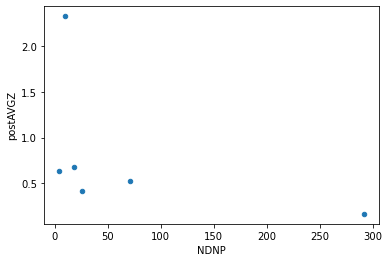

In [75]:
dfrats.plot(x='NDNP',y='postAVGZ',kind='scatter')

<AxesSubplot:xlabel='NDNP', ylabel='postAVGZ'>

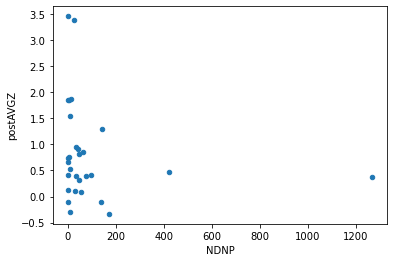

In [76]:
df.plot(x='NDNP',y='postAVGZ',kind='scatter')

In [77]:
1 not in []

True

In [87]:
dfrats.append(df,ignore_index=True) == pd.concat((dfrats,df),ignore_index=True)

preF  preA  postF  postA  NDNP  postAVGZ
0   True  True   True   True  True      True
1   True  True   True   True  True      True
2   True  True   True   True  True      True
3   True  True   True   True  True      True
4   True  True   True   True  True      True
5   True  True   True   True  True      True
6   True  True   True   True  True      True
7   True  True   True   True  True      True
8   True  True   True   True  True      True
9   True  True   True   True  True      True
10  True  True   True   True  True      True
11  True  True   True   True  True      True
12  True  True   True   True  True      True
13  True  True   True   True  True      True
14  True  True   True   True  True      True
15  True  True   True   True  True      True
16  True  True   True   True  True      True
17  True  True   True   True  True      True
18  True  True   True   True  True      True
19  True  True   True   True  True      True
20  True  True   True   True  True      True
21  True  True   True   True  True      True
22  True  True   True   True  True      True
23  True  True   True   True  True      True
24  True  True   True   True  True      True
25  True  True   True   True  True      True
26  True  True   True   True  True      True
27  True  True   True   True  True      True
28  True  True   True   True  True      True
29  True  True   True   True  True      True
30  True  True   True   True  True      True
31  True  True   True   True  True      True
32  True  True   True   True  True      True
33  True  True   True   True  True      True
34  True  True   True   True  True      True